In [7]:
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import objectives
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [5]:

# データセット読み込み
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# モデル構築
encoding_dim = 32
input_img = Input(shape=(784,))
x1 = Dense(256, activation='relu')(input_img)  
x2 = Dense(64, activation='relu')(x1)  
encoded = Dense(encoding_dim, activation='relu')(x2) 
x3 = Dense(64, activation='relu')(encoded)
x4 = Dense(256, activation='relu')(x3)  
decoded = Dense(784, activation='sigmoid')(x4) 
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()  

# 学習
autoencoder.fit(x_train, x_train,
                epochs=50,    
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# 学習モデルでテスト画像を変換
decoded_imgs = autoencoder.predict(x_test)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_17 (Dense)             (None, 784)              

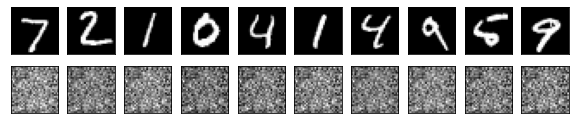

In [8]:
n = 10
plt.figure(figsize=(10, 2))
for i in range(n):
    # テスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
print(decoded_imgs[0])

[0.4646361  0.5289203  0.48515308 0.50075316 0.50669473 0.4919914
 0.494313   0.5267574  0.46591735 0.47331032 0.46801066 0.505766
 0.46015564 0.51811105 0.5082742  0.521038   0.49956432 0.48379308
 0.5145647  0.47716114 0.4832612  0.48898423 0.48338276 0.4881628
 0.47776473 0.49812576 0.49117696 0.52167684 0.4771787  0.4631279
 0.48031646 0.50260836 0.49678177 0.48813668 0.46695778 0.4778573
 0.47163165 0.47722498 0.5088323  0.4781264  0.5271883  0.47905174
 0.5128828  0.5177792  0.48044726 0.49347717 0.48808676 0.48795402
 0.49331293 0.52019656 0.4737699  0.52634096 0.49724835 0.48285985
 0.51139456 0.492693   0.48240978 0.48339143 0.48727632 0.51663697
 0.48605445 0.52260864 0.50437754 0.48676625 0.4850257  0.47338417
 0.5057444  0.48101556 0.5117703  0.45556936 0.5039178  0.4957505
 0.47017258 0.49876106 0.5078739  0.45779884 0.51621276 0.49010178
 0.46484903 0.47956297 0.4923377  0.45684093 0.50475144 0.48164725
 0.46272525 0.4867979  0.46700037 0.47230977 0.50553125 0.4903649
 0.